### 1&2. Importing libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Check matplotlib version
matplotlib.__version__

'3.7.2'

### 3. Clean the data

##### Data was cleaned and wrangled in Task 6.2

### 4. Explore the data visually

In [37]:
# Import data

df = pd.read_csv('2015-2019_Dystopia.csv')

In [38]:
# Verify the imported data

df.head()

,Happiness Rank,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,Dystopia_Residuals,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.517,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.702,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.492,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.465,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.452,2015


##### Extreme values checks

/tmp/ipykernel_146/4187969568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GDP per Capita'], bins=25) # Shows extreme values


<Axes: xlabel='GDP per Capita', ylabel='Density'>

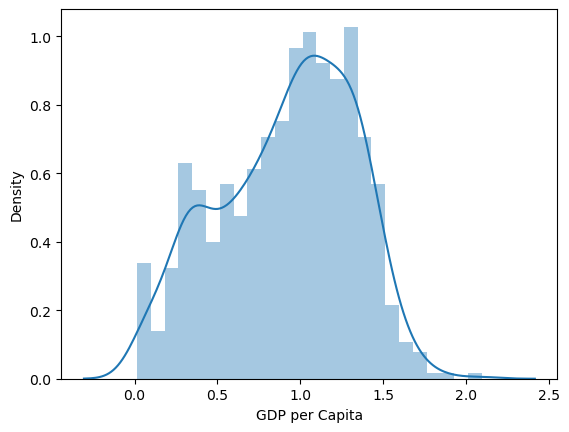

In [40]:
sns.distplot(df['GDP per Capita'], bins=25) # Shows extreme values

In [41]:
df['GDP per Capita'].mean() # Check the mean

0.9168791839731799

In [42]:
df['GDP per Capita'].median() # Check the median

0.982

In [43]:
df['GDP per Capita'].max() # Check the max

2.096

##### Because there is not a significant difference between the mean and the median values
##### we will continue the analysis with the full data set.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


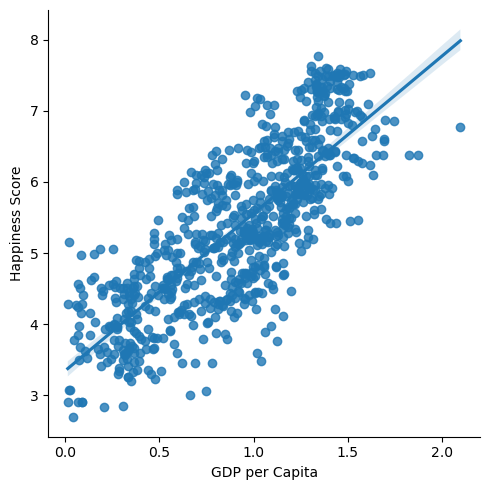

In [53]:
# Create a scatterplot for the Happiness Score and GDP per capita columns in seaborn

sns.lmplot(x = 'GDP per Capita', y = 'Happiness Score', data = df)
plt.savefig("scatterplot_GDP_HS.jpg")  # save the scatterplot
plt.show() # show the scatterplot

### 5. State the hypothesis

##### **The higher the GDP per Capita, the higher the Happiness Score. 

### 6. Reshape the variables into NumPy arrays

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['GDP per Capita'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [60]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [62]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

### 7. Split the data into two sets: training and test sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a linear regression on the data.

In [68]:
# Create a regression object.

regression = LinearRegression()

In [70]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [74]:
y_predicted

array([[5.99879803],
       [6.22435226],
       [6.35687545],
       [6.42967177],
       [3.99396449],
       [5.55508827],
       [3.95619852],
       [3.92892798],
       [6.49747485],
       [5.97292313],
       [5.69883443],
       [5.45594656],
       [5.02550236],
       [4.93767453],
       [3.4013462 ],
       [6.35275654],
       [4.69186402],
       [5.1072289 ],
       [5.82899527],
       [5.71564814],
       [7.37329398],
       [3.9693727 ],
       [4.81032418],
       [6.10358899],
       [7.0794001 ],
       [5.63810148],
       [5.01671958],
       [6.63494737],
       [4.03921491],
       [6.5141841 ],
       [6.39561653],
       [5.59638326],
       [5.88672012],
       [3.99791674],
       [6.38024666],
       [4.18015949],
       [3.42484014],
       [5.65885081],
       [4.9866368 ],
       [6.02856206],
       [4.09285863],
       [6.1821468 ],
       [6.08602342],
       [5.69734136],
       [6.15189429],
       [6.112767  ],
       [5.13967854],
       [5.624

### 9. Create a plot that shows the regression line on the test set.

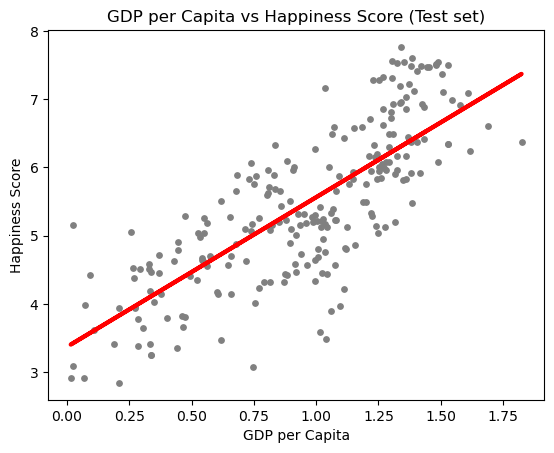

In [76]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

### 10. Interpretation of how well the line appears to fit the data
We notice from the plot above that there are some data points which are significantly below the regression line, meaning that although the GDP per Capita is relatively high, the Happiness Score is relatively low, especially around the value of 1.00 for the GDP per Capita. This is contrary to the hypothesis.

Overall, I think that the regression line is offering good guidance in predicting the Happiness Score.

### 11. Check the model performance statistics—MSE and R2 score

In [80]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.19569577]]
Mean squared error:  0.513492594344953
R2 score:  0.6109509980504184


### 12. Compare the predicted y values with the actual y values in a dataframe

In [85]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.500,5.998798
1,6.814,6.224352
2,6.168,6.356875
3,7.119,6.429672
4,3.781,3.993964
5,4.644,5.555088
6,4.374,3.956199
7,5.057,3.928928
8,6.929,6.497475
9,5.488,5.972923


### 13. Include your thoughts on how well the model performed on the test set

- As noted above at #10, from the visual interpretation of the GDP per Capita vs Happiness Score (Test set)
plot, the accuracy of the model seems to be acceptable, although there are still several data points that indicate a relatively low Happiness Score at a higher GDP per Capita.

- By checking the first of the model's summary statistics, the slope, we observe that this is positive, indicating that the GDP per Capita rises, Happiness Score rises at a degree of almost 2.2. However, while it does tell you the regression has a positive slope, it doesn’t actually tell how well the model performed.
  
- The model achieved a Root Mean Squared Error (RMSE) of 0.51. Given that the target variable ranges from 2.85 to 7.77, this RMSE represents approximately 10.4% of the data's range.
With an RMSE of 0.51, the model's predictions are, on average, within 10.4% of the actual values relative to the data's spread.
The model demonstrates a reasonable level of accuracy, with an average prediction error of 0.51 units. This translates to approximately 10.4% of the target variable's range (2.85 to 7.77).

- The regression model achieved an R-squared of 0.61, indicating that it explains 61% of the variance in the target variable, which ranges from 2.85 to 7.77. While the model captures a substantial portion of the variance, approximately 39% remains unexplained, suggesting that other factors not included in this model may influence the target variable. Further investigation may be warranted to explore these additional factors and potentially improve the model's predictive capability.